## 简单绘图展示

Text(1, -1, '$Origin$')

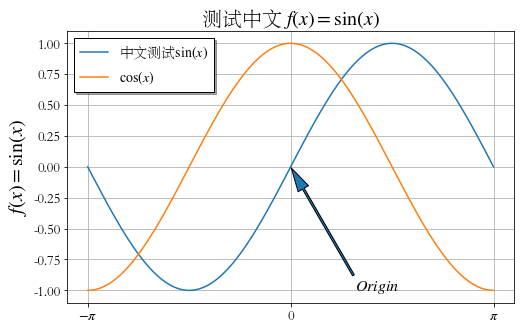

In [51]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib widget
x = np.linspace(-np.pi,np.pi,100)
plt.figure(figsize=(8,5))
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
plt.title('测试中文 $f(x) = \sin(x) $',fontsize=20,loc = 'center')
plt.xticks([-np.pi,0,np.pi],['$-\pi$',0,'$\pi$'],fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylabel('$f(x) = \sin(x)  $',size=20,rotation=90)
plt.legend(['中文测试$\sin(x)$','$\cos(x)$'],fontsize=14,fancybox=False,shadow=True,edgecolor='black')
plt.annotate(text = '$Origin$',xy=(0,0),xytext=(1,-1),arrowprops=
             {'width':2,'headwidth':12,'headlength':24,'shrink':0.01},fontsize=16)
#plt.savefig('test.png',dpi=150,facecolor='white',)

## Cd Cl求平均值及绘图

0.11433163019065228
0.11537596379152021
0.11660316971516936
0.11767655832767332
0.11817897104682581
0.11862327681984543
0.11913418050881391
0.11283833832905255
0.11339181305511527
0.11798138536161834
0.1182211489461487
0.12011738639417541
0.12064907568635874


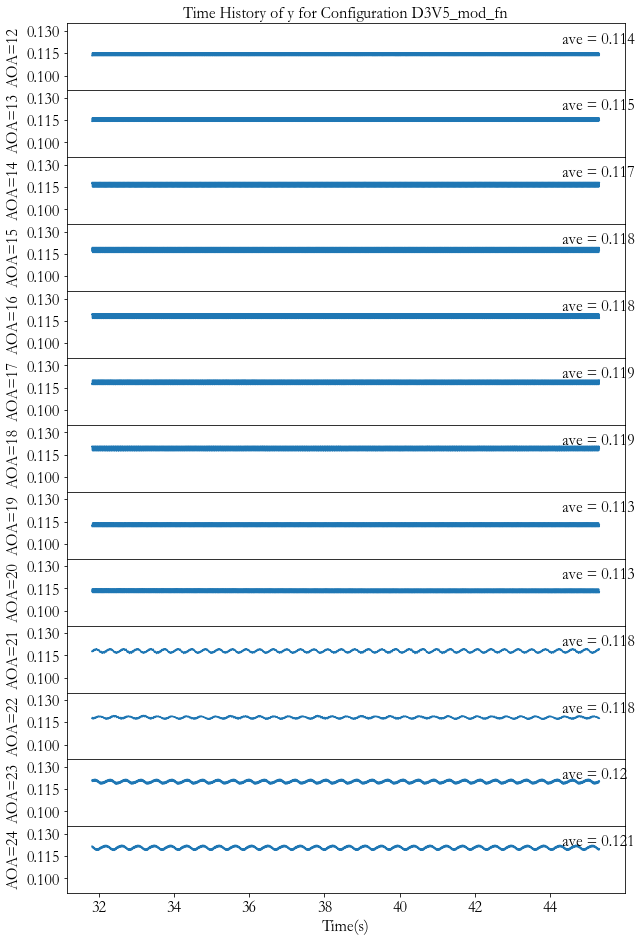

In [122]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25)
Mx = 'D3V5_mod_fn'
cx = 'y'
num_to_ave = 10000
num_to_plot = 30000
num_to_skip = 30000
max_rows = 90000

fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    if cx=='cl' or cx=='cd':
        path_to_file='temp data/2DVIV/04_airfoil/'+ Mx +'/'+ cx + '/'+ cx + '_a_' + str(aoa) + '.txt'
    elif cx=='x' or cx=='y':
        path_to_file='temp data/2DVIV/04_airfoil/'+ Mx +'/'+ cx + '/AOA' + str(aoa) + '_' + cx + '.csv'  ## or '.csv'
    data1 = np.loadtxt(path_to_file,skiprows=num_to_skip,delimiter=',',max_rows=max_rows,)
    axs[i].plot(data1[-num_to_plot:,0],data1[-num_to_plot:,1])
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    ave=np.mean(data1[-num_to_ave:,1])
    #axs[i].grid(True)
    if cx == 'cl':
        axs[i].set_yticks(np.arange(0.1, 1.4, 0.3))
        axs[i].set_ylim(0.5, 1.5)
        axs[i].annotate('ave = '+str(round(ave,3)),xy=(data1[-1][0]-1.0,1.2),fontsize=16)
    elif cx == 'cd':
        axs[i].set_yticks(np.arange(0.0, 0.6, 0.2))
        axs[i].set_ylim(0.0, 0.6)
        axs[i].annotate('ave = '+str(round(ave,3)),xy=(data1[-1][0]-1.0,0.45),fontsize=16)
    else:
        axs[i].set_yticks(np.arange(0.04, 0.15, 0.015))
        axs[i].set_ylim(0.09, 0.135)
        axs[i].annotate('ave = '+str(round(ave,3)),xy=(data1[-1][0]-1.0,0.122),fontsize=16)
    print(ave)
axs[0].set_title("Time History of "+ cx + ' for Configuration ' + Mx ,size=16,)
axs[-1].set_xlabel('Time(s)',size=16,)
plt.savefig(Mx + '_' + cx +'.png',dpi=150,facecolor='white',bbox_inches='tight')    

## X、Y位移时程绘制

0.01083770781487333
0.012074459026126846
0.013021156509387666
0.013340106798027381
0.0077856176201613805
0.008010621059415099
0.008170378318960905
0.008342092467291997
0.008541633034088761
0.008777841540291986
0.009000837904331555
0.009257743581598712
0.009727706429343069


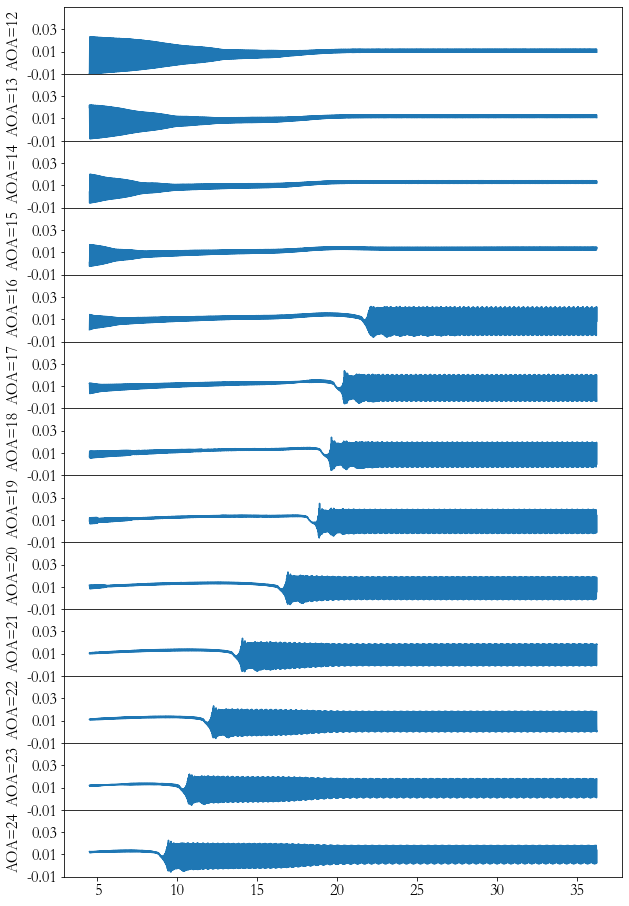

In [16]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25)
Mx = 'D3S8'
cx = 'y'
num_to_ave = 10000
num_to_skip = 10000

fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/04_airfoil/'+ Mx +'/'+ cx +
                       '/AOA'+str(aoa)+'_'+ cx +'.txt',skiprows=num_to_skip,
#                        max_rows=88000
                       delimiter=',',
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,0],data1[:,1])
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_yticks(np.arange(-0.01, 0.05, 0.02))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(-0.01, 0.05)
    print(np.mean(data1[-num_to_ave:,1]))
plt.savefig('test.png',dpi=150,facecolor='white',)   

## 网格无关性验证数据处理

In [ ]:
#%matplotlib widget
#此为对变换之前的cd cl txt文件（两列数据）进行平均值计算和绘图的小程序
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25)
mesh='M3'
cx = 'cd'
num_to_ave = 10000
num_to_skip = 3

name = 'AOA'
fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/04_airfoil/Mesh_Independence/'+mesh+'/'+ cx +
                       '/'+name+str(aoa)+'_trans_'+cx+'.txt',skiprows=num_to_skip
#                        , delimiter=','
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,0],data1[:,1])
    axs[i].tick_params(axis='both', labelsize=16)
#     axs[i].set_yticks(np.arange(0.01, 0.07, 0.02))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(0.0, 0.5)
    print(np.mean(data1[-num_to_ave:,1]))
#plt.savefig('test2.png',dpi=150,facecolor='white',)  

In [8]:
# 对原始Cd cl txt文件增加时间列
import numpy as np
cx='cd'
mesh='M5_mod_time'
aoas = range(13,25)
for aoa in aoas:
    data = np.loadtxt('temp data/2DVIV/04_airfoil/Mesh_Independence/'+mesh+'/'+cx+'/AOA'+str(aoa)+
                      '_'+cx+'.txt',dtype=float,skiprows=3)
    real_time = data[:,0]*np.sin(aoa*np.pi/180)/(5.44104*30)
    a = np.insert(data,1,real_time,1)
    np.savetxt('temp data/2DVIV/04_airfoil/Mesh_Independence/'+mesh+'/'+cx+'/mod_AOA'+str(aoa)+'_'+cx+'.txt',
               a,fmt='%d %.7f %.7f')

1.18164277289
1.2083336132200002
1.18720036708
1.0276038453
0.85482045939
0.85388328029
0.83754021072
0.8173160598900001
0.8034820717399999
0.80977594178
0.84674039065
0.8905840136500001


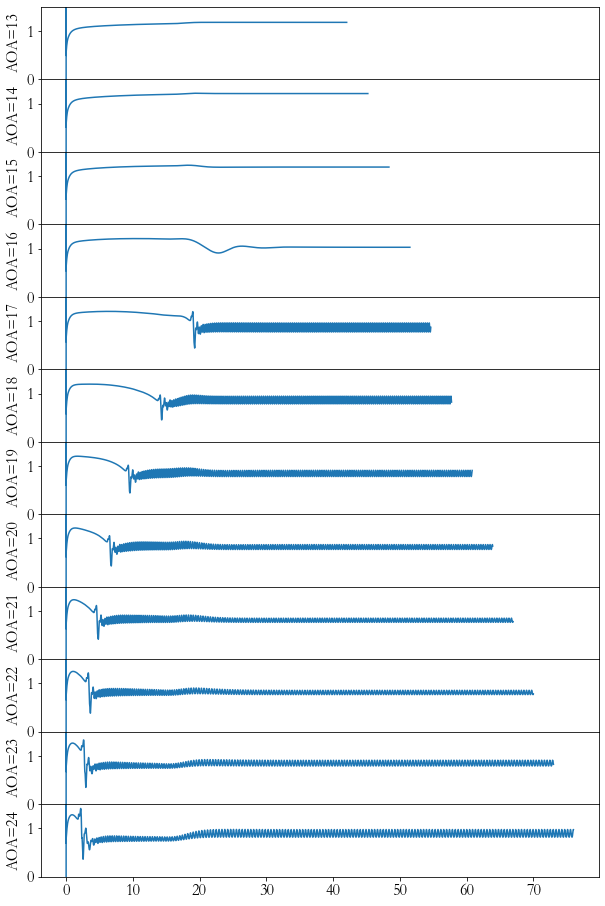

In [12]:
#%matplotlib widget
#此为对变换之后的cd cl txt文件（三列数据加入了时间列）进行平均值计算和绘图的小程序
import numpy as np
import matplotlib.pyplot as plt

aoas = range(13,25)
mesh='M3_mod_time'
cx = 'cl'
num_to_ave = 10000
num_to_skip = 0

name = 'mod_AOA'
fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/04_airfoil/Mesh_Independence/'+mesh+'/'+ cx +
                       '/'+name+str(aoa)+'_'+cx+'.txt',skiprows=num_to_skip
#                        , delimiter=','
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,1],data1[:,2])
    axs[i].tick_params(axis='both', labelsize=16)
#     axs[i].set_yticks(np.arange(0.01, 0.07, 0.02))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(0.0, 1.5)
    print(np.mean(data1[-num_to_ave:,2]))
# plt.savefig('test2.png',dpi=150,facecolor='white',)  

## 压力系数RMS值

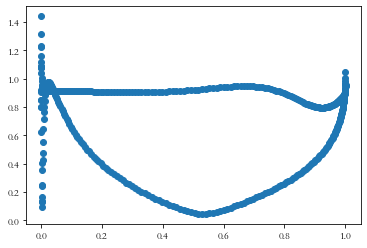

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.loadtxt('cp_out.csv',skiprows=1,dtype=float,delimiter=',',
               usecols=range(1,401),max_rows=1)
data = np.loadtxt('cp_out.csv',skiprows=2,dtype=float,
                   delimiter=',',usecols=range(1,401),max_rows=1777)
# data = np.loadtxt('myfile'+str(i)+'.csv',skiprows=1,dtype=float,
#                    delimiter=',',usecols=0)

# for i in range(2,4):
#     a = np.loadtxt('myfile'+str(i)+'.csv',skiprows=1,dtype=float,
#                    delimiter=',',usecols=[1,-2])
#     data = np.vstack((data,a))
rms = np.sqrt(np.mean(data**2,axis=0))
np.savetxt('cp_rms.csv',np.vstack((x,rms)).T,fmt='%.7f',delimiter=',',)
np.vstack((x,rms)).shape
plt.scatter(x,rms)

## 徐帅师兄S809翼型Cl Cd求平均值

AOA= 12 : 0.036478515
AOA= 14 : 0.055438157099999996
AOA= 16 : 0.0743185439
AOA= 18 : 0.099575275
AOA= 20 : 0.151775739
AOA= 22 : 0.419122007
AOA= 24 : 0.482027651


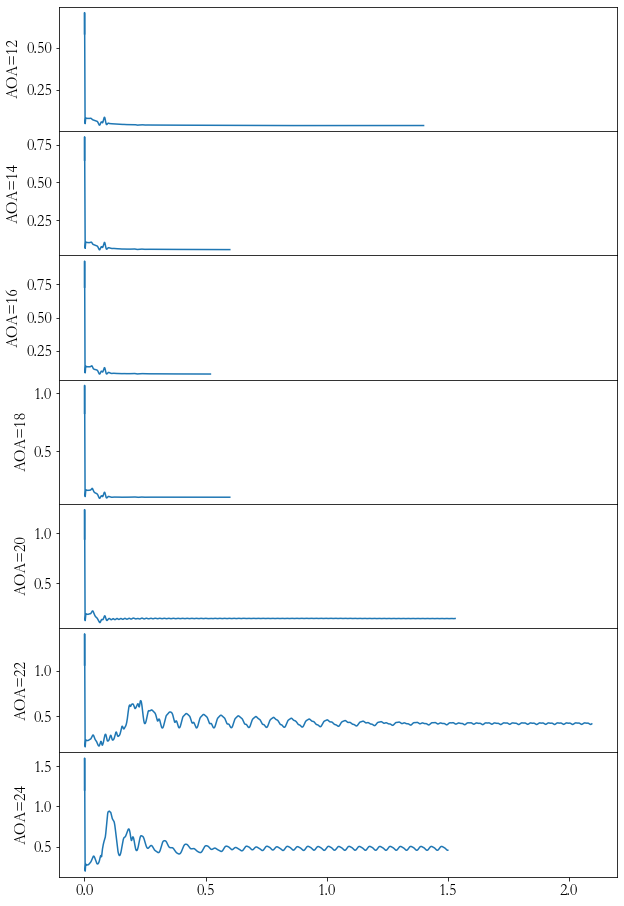

In [50]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25,2)
cx = 'cd-1-history'
num_to_ave = 1000


fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/045/S809/'+ str(aoa) +'/'+ cx 
                       ,skiprows=2,
#                        max_rows=88000
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,0],data1[:,1])
    axs[i].tick_params(axis='both', labelsize=16)
#     axs[i].set_yticks(np.arange(0.1, 1.1, 0.3))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
#     axs[i].set_ylim(0.5, 1.3)
    print('AOA=',aoa,':',np.mean(data1[-num_to_ave:,1]))
# plt.savefig('test.png',dpi=150,facecolor='white',)    

## 修改徐帅师兄的时间步长后重新算的S809 Cl Cd平均值

1.2108897986764648
1.2320596699940343
1.2636767652082599
1.2525232134851043
1.1314365958584593
0.9190253281722606
0.9604874233748204


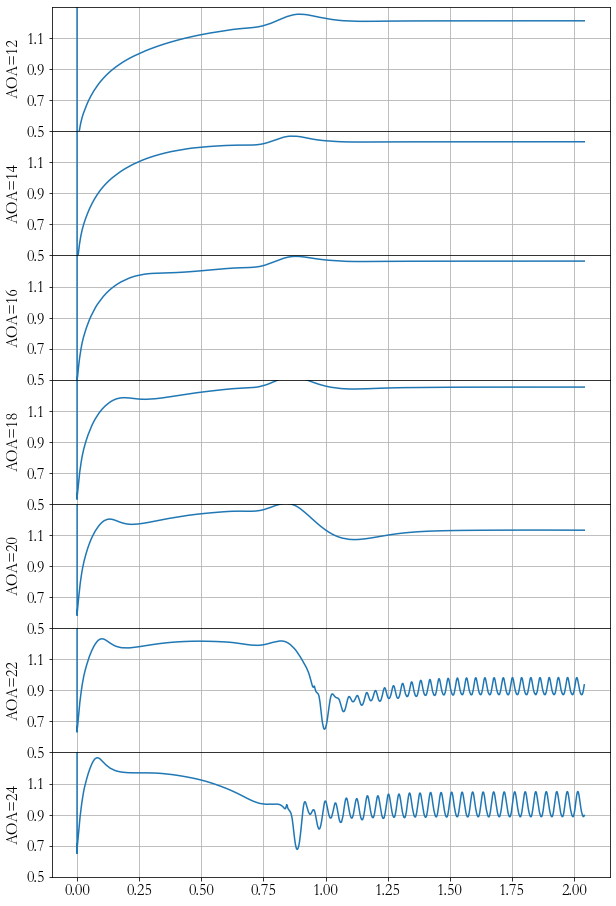

In [2]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25,2)
cx = 'cl-1-history.out'
num_to_ave = 2500


fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/045/S809/mytest_VIPO/AOA'+ str(aoa) +'/'+ cx  #速度进压力出
#     data1 = np.loadtxt('temp data/2DVIV/045/S809/mytest/AOA'+ str(aoa) +'/'+ cx       #压力远场
                       ,skiprows=3,
#                        max_rows=88000
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,1],data1[:,2])
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_yticks(np.arange(0.5, 1.3, 0.2))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(0.5, 1.3)
    axs[i].grid(True)
#     print('AOA=',aoa,':',np.mean(data1[-num_to_ave:,1]))
    print(np.mean(data1[-num_to_ave:,2]))
# plt.savefig('test.png',dpi=150,facecolor='white',)

## 徐帅师兄静止圆柱算例Cd Cl读取及计算

In [ ]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(12,25,2)
cx = 'cd-1-history'
num_to_ave = 3000


fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/045/static_cylinder/X1Y2cylinder0.9cm/'+ str(aoa) +'/'+ cx 
                       ,skiprows=2,
#                        max_rows=88000
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,0],data1[:,1])
    axs[i].tick_params(axis='both', labelsize=16)
#     axs[i].set_yticks(np.arange(0.1, 1.1, 0.3))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(0.0,1.4)
    print('AOA=',aoa,':',np.mean(data1[-num_to_ave:,1]))
# plt.savefig('test.png',dpi=150,facecolor='white',) 

## 徐帅师兄振动圆柱算例Cd Cl读取及计算

(21669, 2)
1.0510298859999998


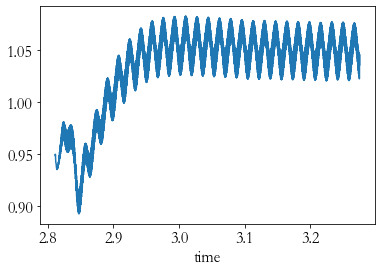

In [32]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

cx = 'cl-1-history'
num_to_ave = 5000

data1 = np.loadtxt('temp data/2DVIV/045/vibrating_cylinder/20deg/AOA20D1fs1.00/'+ cx
# data1 = np.loadtxt('temp data/2DVIV/045/vibrating_cylinder/22deg/AOA22D1fs1.00/'+ cx
# data1 = np.loadtxt('temp data/2DVIV/045/vibrating_cylinder/24deg/AOA24D2fs1.00/'+ cx
                   ,skiprows=3,)
plt.plot(data1[:,0],data1[:,1])
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('time',size=16)
print(data1.shape)
print(np.mean(data1[-num_to_ave:,1]))
# plt.savefig('test.png',dpi=150,facecolor='white',)

## 修改师兄的时间步长后重新跑的振动圆柱结果

0.9871311535999999
1.0754926649999998
1.0873488766000001


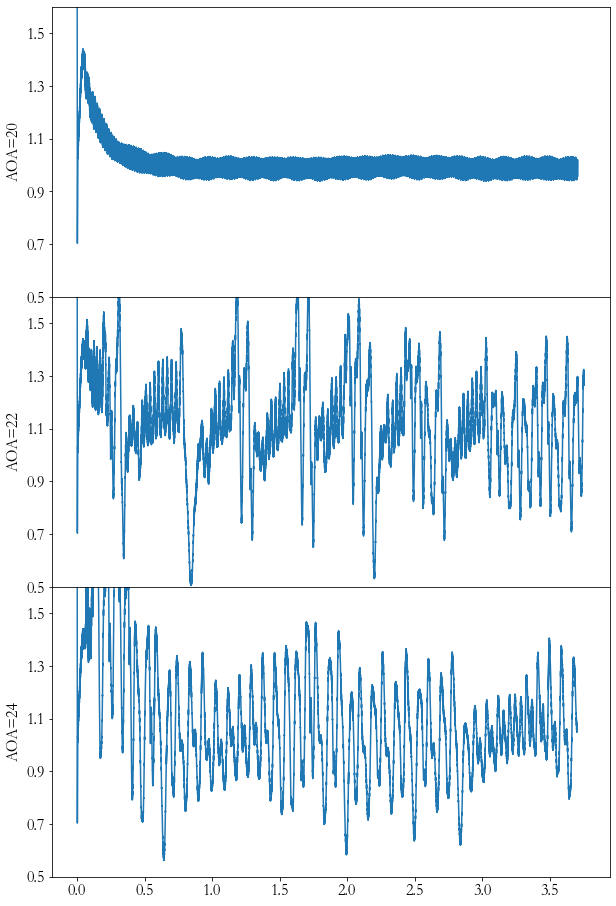

In [53]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

aoas = range(20,25,2)
cx = 'cl-1-history'
num_to_ave = 5000


fig, axs = plt.subplots(len(aoas), 1, sharex=True,figsize=(10, 16))
fig.subplots_adjust(hspace=0)
# fig.suptitle('A tale of 2 subplots')
for i,aoa in enumerate(aoas):
    data1 = np.loadtxt('temp data/2DVIV/045/vibrating_cylinder/mytest/AOA'+ str(aoa) +'/'+ cx  #速度进压力出
                       ,skiprows=2,
#                        max_rows=88000
                      )
#    axs[i].plot(data1[-num_to_ave:,0],data1[-num_to_ave:,1])
    axs[i].plot(data1[:,0],data1[:,1])
    axs[i].tick_params(axis='both', labelsize=16)
    axs[i].set_yticks(np.arange(0.5, 1.8, 0.2))
    axs[i].set_ylabel('AOA='+str(aoa),size=16,rotation=90)
    axs[i].set_ylim(0.5, 1.6)
#     print('AOA=',aoa,':',np.mean(data1[-num_to_ave:,1]))
    print(np.mean(data1[-num_to_ave:,1]))
# plt.savefig('test.png',dpi=150,facecolor='white',)

## 固定位置文件读取并绘图

(122762, 3)
0.8746189570661184


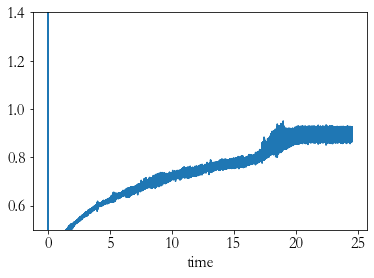

In [6]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

cx = 'cl_a-rfile.out'
num_to_ave = 5000

# data1 = np.loadtxt('temp data/2DVIV/045/other/'+ cx 
data1 = np.loadtxt( cx 
                   ,skiprows=3,)
plt.plot(data1[:,2],data1[:,1])
plt.tick_params(axis='both', labelsize=16)
plt.xlabel('time',size=16)
plt.ylim(0.5,1.4)
print(data1.shape)
print(np.mean(data1[-num_to_ave:,1]))
# plt.savefig('test.png',dpi=150,facecolor='white',)

## 由已知的圆柱和翼型升阻力系数计算合升阻力系数
$$
\begin{vmatrix}
   F_d \\
   F_l
\end{vmatrix}
=
\begin{vmatrix}
  \cos(\alpha) & \sin(\alpha) \\
  -\sin(\alpha) & \cos(\alpha) 
\end{vmatrix}
\times
\begin{vmatrix}
   F_x \\
   F_y 
\end{vmatrix}
$$

In [95]:
import numpy as np

def run_transform(dir,aoa):
    fd = open('transform_results.txt','a+')
    try:
        data_cl = np.loadtxt(dir + 'cl-rfile.out',skiprows=3)
        data_cd = np.loadtxt(dir + 'cd-rfile.out',skiprows=3)
        data_cy_cy = np.loadtxt(dir + 'cl_cy-rfile.out',skiprows=3)
        data_cy_cx = np.loadtxt(dir + 'cd_cy-rfile.out',skiprows=3)
    except:
        fd.write(dir+'部分文件不存在')
        fd.close()
        return 0
    else:
        lines = np.array([data_cl.shape[0],data_cd.shape[0],data_cy_cy.shape[0],data_cy_cx.shape[0]])
        line_min = np.min(lines)

        if np.max(lines) != line_min:
            data_cl = data_cl[:line_min,:]
            data_cd = data_cd[:line_min,:]
            data_cy_cy = data_cy_cy[:line_min,:]
            data_cy_cx = data_cy_cx[:line_min,:]
            fd.write(dir +'存在行数不一致，采用最小行'+str(line_min)+'\n')
        else:
            fd.write(dir +'行数一致，共'+str(line_min)+'行\n')

        data_a_cl = np.c_[data_cl[:,2],data_cl[:,1]
                          -data_cy_cx[:,1]*np.sin(aoa*np.pi/180)+data_cy_cy[:,1]*np.cos(aoa*np.pi/180)]
        data_a_cd = np.c_[data_cl[:,2],data_cd[:,1]
                          +data_cy_cx[:,1]*np.cos(aoa*np.pi/180)+data_cy_cy[:,1]*np.sin(aoa*np.pi/180)]
        np.savetxt( dir + 'cl_a_calc.csv',data_a_cl,delimiter=',',fmt='%.5f,%.7f',)
        np.savetxt( dir + 'cd_a_calc.csv',data_a_cd,delimiter=',',fmt='%.5f,%.7f',)
        fd.close()
        return 0

    
aoas = range(12,25)
for i,aoa in enumerate(aoas):
    dir = 'AOA' + str(aoa) + '/'
    run_transform(dir,aoa)

## 照片截取固定大小

In [5]:
import matplotlib.pyplot as plt
aoas = range(13,14)
base_dir = "F:/00TEMP/temp data/2DVIV/04_airfoil/D2V4/results/T=36sVort/AOA"
for aoa in aoas:
    dir = base_dir + str(aoa) + '.png'
    new_dir = base_dir + str(aoa) + '_2.png'
    pic = plt.imread(dir)
    new_pic = pic[139:-140,209:-195,:]
    plt.imsave(new_dir,new_pic)